# 🇺🇸 vs 🇨🇦 Excess Mortality

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
myFmt = mdates.DateFormatter('%Y-%m-%d')

## Organize USA data

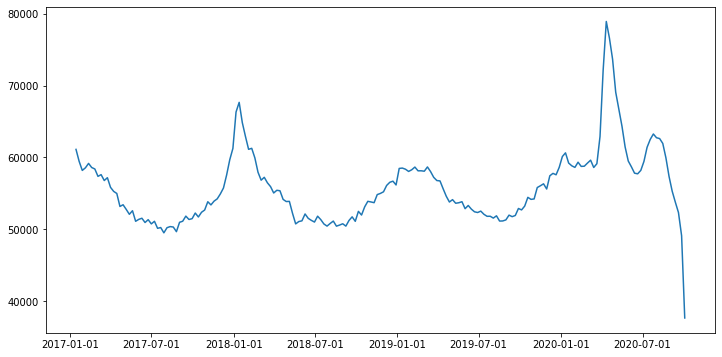

In [2]:
# data sourced from [2]
plt.figure(figsize=(12,6))
plt.gca().xaxis.set_major_formatter(myFmt)
usa_data = pd.read_csv('./data/usa_weekly_death_counts.csv') 
filtered_usa_data = usa_data[(usa_data.State == 'United States') & (usa_data.Type == 'Unweighted') & (usa_data.Outcome =='All causes')]
filtered_usa_data = filtered_usa_data[['Week Ending Date', 'Observed Number']]
filtered_usa_data = filtered_usa_data.rename(columns={'Week Ending Date': 'date', 'Observed Number': 'usa_death_count'})

t=pd.to_datetime(filtered_usa_data['date'])
compatible_date = np.array(t, dtype=np.datetime64)

filtered_usa_data = filtered_usa_data.set_index('date')

plt.plot(compatible_date, filtered_usa_data, label = 'usa_weekly_death_counts')

## Organize Canada data

/Users/joshnielsen/miniconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


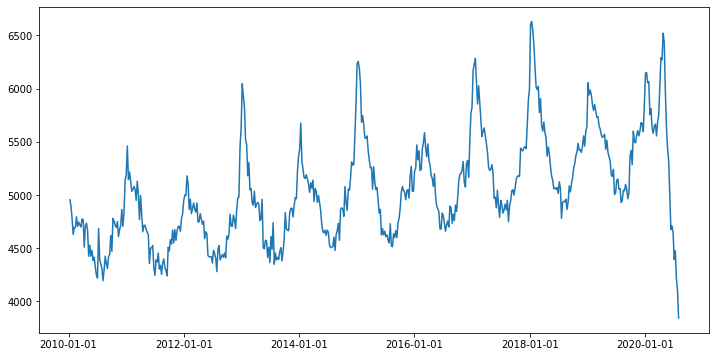

In [3]:
# data sourced from [1]
plt.figure(figsize=(12,6))
plt.gca().xaxis.set_major_formatter(myFmt)
can_data = pd.read_csv('./data/canada_weekly_death_counts.csv') 
filtered_can_data = can_data[(can_data.GEO == 'Canada, place of occurrence') & (can_data.Sex == 'Both sexes') & (can_data['Age at time of death'] == 'Age at time of death, all ages')]
filtered_can_data = filtered_can_data[['REF_DATE', 'VALUE']]
filtered_can_data = filtered_can_data.rename(columns={'REF_DATE': 'date', 'VALUE': 'canada_death_count'})

t=pd.to_datetime(filtered_can_data['date'])
compatible_date = np.array(t, dtype=np.datetime64)

filtered_can_data = filtered_can_data.set_index('date')
plt.plot(compatible_date, filtered_can_data, label = 'can_weekly_death_counts')

## Concat USA and CAN data

In [4]:
combined_df = pd.concat([filtered_can_data, filtered_usa_data], axis=1).dropna()
combined_df.describe()

,canada_death_count,usa_death_count
count,186.000000,186.000000
mean,5410.806452,55809.575269
std,470.917902,4931.862773
min,3845.000000,49493.000000
25%,5055.000000,51874.000000
50%,5420.000000,54944.500000
75%,5668.750000,58443.500000
max,6630.000000,78930.000000


In [5]:
combined_df

,canada_death_count,usa_death_count
2017-01-14,6225.0,61114.0
2017-01-21,6285.0,59444.0
2017-01-28,6060.0,58186.0
2017-02-04,5855.0,58550.0
2017-02-11,6025.0,59162.0
...,...,...
2020-07-04,4395.0,59440.0
2020-07-11,4475.0,61407.0
2020-07-18,4220.0,62501.0
2020-07-25,4100.0,63258.0


Now we have a nice dataframe to perform the excess death rate calulations on. See above, there are 186 observations for our analysis. 186/52 3.58 years. Since we need a average of the death rate, we'll reserve the final year (52 observations) for the analysis and use the preceding observations to determine our statistic.

In [6]:
# start date for combined df is 2017-01-14 and falls in the 28th week of the year
# I'm making a 5 lists of 1 through 52 and going to slice it from 27 thru 186+27 to 
# get my week of the year index. Then I'll add it to the combined df.
week_index = [i for i in range(1,53)] * 5
week_index = week_index[27:186+27]
combined_df['week_index'] = week_index
combined_df

,canada_death_count,usa_death_count,week_index
2017-01-14,6225.0,61114.0,28
2017-01-21,6285.0,59444.0,29
2017-01-28,6060.0,58186.0,30
2017-02-04,5855.0,58550.0,31
2017-02-11,6025.0,59162.0,32
...,...,...,...
2020-07-04,4395.0,59440.0,1
2020-07-11,4475.0,61407.0,2
2020-07-18,4220.0,62501.0,3
2020-07-25,4100.0,63258.0,4


In [7]:
# get the historical weekly averages for the first 186-52=134 weeks.

can_weekly_averages = []
usa_weekly_averages = []

first_134 = combined_df[0:133]

for i in range(1, 53):
    # create df slice of weeks with index i
    slice_df = first_134[first_134.week_index == i]
    week_i = 'week_{}'.format(i)
    can_weekly_averages.append(slice_df['canada_death_count'].mean())
    usa_weekly_averages.append(slice_df['usa_death_count'].mean())


last_52 = combined_df[134:186]
last_52

,canada_death_count,usa_death_count,week_index
2019-08-10,4950.0,51862.0,6
2019-08-17,5045.0,51132.0,7
2019-08-24,5040.0,51148.0,8
2019-08-31,5100.0,51296.0,9
2019-09-07,5055.0,51959.0,10
2019-09-14,4965.0,51747.0,11
2019-09-21,5015.0,51910.0,12
2019-09-28,5360.0,52885.0,13
2019-10-05,5420.0,52687.0,14
2019-10-12,5285.0,53221.0,15


In [8]:
can_weekly_averages_shifted = can_weekly_averages[6:53]+can_weekly_averages[:6]
usa_weekly_averages_shifted = usa_weekly_averages[6:53]+usa_weekly_averages[:6]
last_52['can_weekly_averages_shifted'] = can_weekly_averages_shifted
last_52['usa_weekly_averages_shifted'] = usa_weekly_averages_shifted
last_52

/Users/joshnielsen/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/joshnielsen/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,canada_death_count,usa_death_count,week_index,can_weekly_averages_shifted,usa_weekly_averages_shifted
2019-08-10,4950.0,51862.0,6,4855.000000,50363.000000
2019-08-17,5045.0,51132.0,7,4882.500000,50118.000000
2019-08-24,5040.0,51148.0,8,4940.000000,50858.500000
2019-08-31,5100.0,51296.0,9,5062.500000,50770.000000
2019-09-07,5055.0,51959.0,10,5040.000000,51517.500000
2019-09-14,4965.0,51747.0,11,5052.500000,51536.500000
2019-09-21,5015.0,51910.0,12,5115.000000,51282.500000
2019-09-28,5360.0,52885.0,13,5197.500000,52368.000000
2019-10-05,5420.0,52687.0,14,5235.000000,51837.500000
2019-10-12,5285.0,53221.0,15,5275.000000,52735.000000


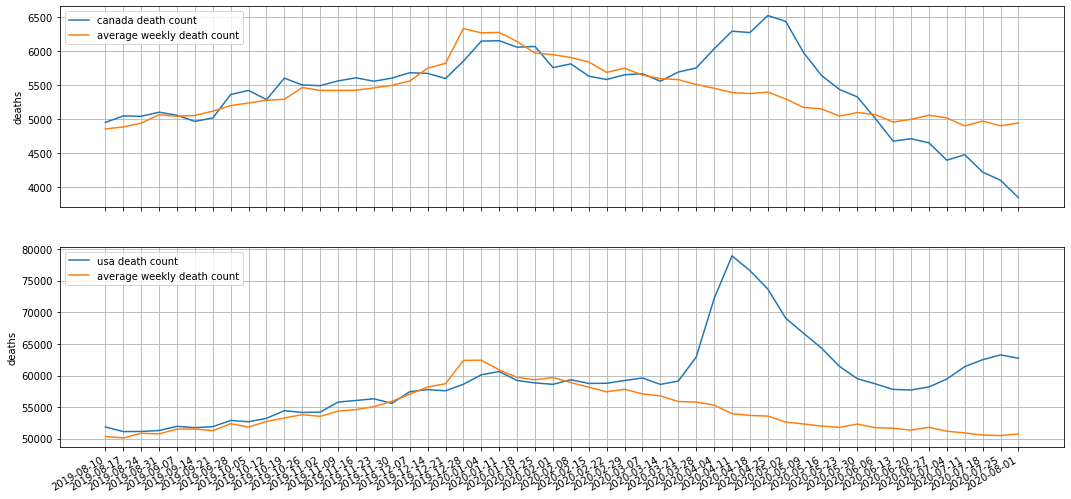

In [9]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(18,9))

time = last_52.index
ax1.plot(last_52.index, last_52.canada_death_count, label='canada death count')
ax1.plot(last_52.index, last_52.can_weekly_averages_shifted, label='average weekly death count')
ax1.grid(True)
ax1.set_ylabel('deaths')
ax1.legend(loc=2)

ax2.plot(last_52.index, last_52.usa_death_count, label='usa death count')
ax2.plot(last_52.index, last_52.usa_weekly_averages_shifted, label='average weekly death count')
ax2.grid(True)
ax2.set_ylabel('deaths')
ax2.legend(loc=2)

fig.autofmt_xdate()

/Users/joshnielsen/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/joshnielsen/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


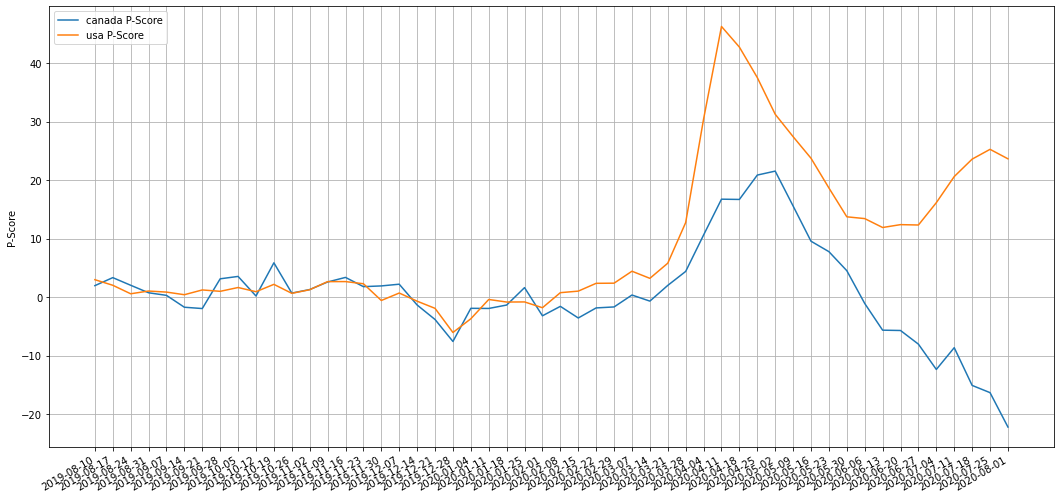

In [10]:
# calculate P-Score
last_52['can_p_score'] = ((last_52['canada_death_count']-last_52['can_weekly_averages_shifted'])/last_52['can_weekly_averages_shifted'])*100
last_52['usa_p_score'] = ((last_52['usa_death_count']-last_52['usa_weekly_averages_shifted'])/last_52['usa_weekly_averages_shifted'])*100

fig, ax1 = plt.subplots(1, 1, figsize=(18,9))

time = last_52.index
ax1.plot(last_52.index, last_52.can_p_score, label='canada P-Score')
ax1.plot(last_52.index, last_52.usa_p_score, label='usa P-Score')
ax1.grid(True)
ax1.set_ylabel('P-Score')
ax1.legend(loc=2)

fig.autofmt_xdate()

References:
 - [1] https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=1310076801
 - [2] https://www.cdc.gov/nchs/nvss/vsrr/covid19/excess_deaths.htm
 - [3] https://ourworldindata.org/excess-mortality-covid